In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./data/cleaned_measurements.csv')

In [3]:
df.head()

,distance,consume,temp_inside,temp_outside,gas_type,AC,rain,sun,temp_diff,fuel_used,cost_of_trip,trip_in_hours,avg_speed
0,28.0,5.0,21.5,12,E10,0,0,0,9.5,1.4000,2.534,0.433333,64.615385
1,12.0,4.2,21.5,13,E10,0,0,0,8.5,0.5040,0.912,0.500000,24.000000
2,11.2,5.5,21.5,15,E10,0,0,0,6.5,0.6160,1.115,0.633333,17.684211
3,12.9,3.9,21.5,14,E10,0,0,0,7.5,0.5031,0.911,0.600000,21.500000
4,18.5,4.5,21.5,15,E10,0,0,0,6.5,0.8325,1.507,0.766667,24.130435


/var/folders/n7/3f1mct1521j5vz1r2r1xwby80000gn/T/ipykernel_41710/2319972083.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


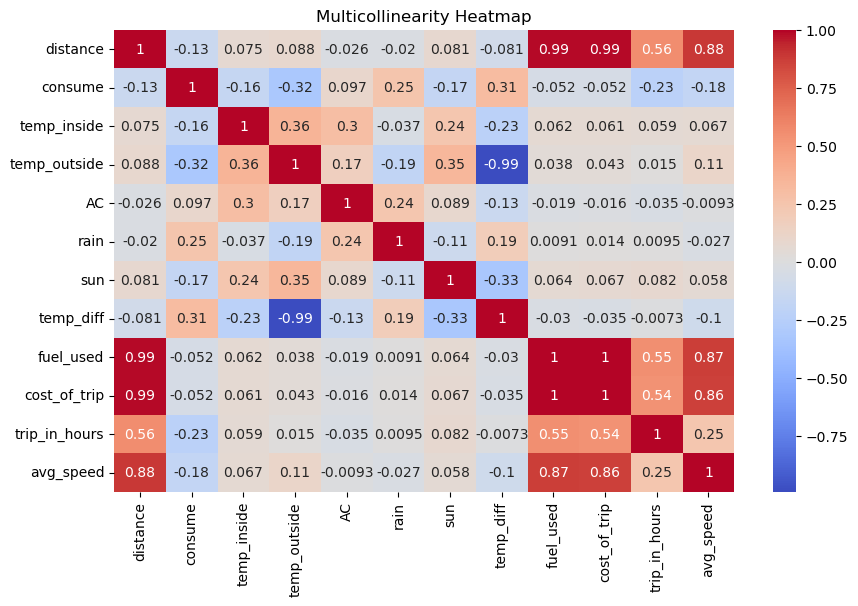

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 6))  

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Multicollinearity Heatmap")
plt.show()

In [5]:
df.drop(['temp_diff', 'cost_of_trip', 'avg_speed'], axis=1, inplace=True)

In [14]:
df.isna().sum()

distance         0
consume          0
temp_inside      0
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
fuel_used        0
trip_in_hours    0
dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('consume', axis=1)  
y = df['consume']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X.isna().sum()

distance         0
temp_inside      0
temp_outside     0
gas_type         0
AC               0
rain             0
sun              0
fuel_used        0
trip_in_hours    0
dtype: int64

In [17]:
y.isna().sum()

0

In [18]:
X_train_num = X_train.select_dtypes(np.number)
X_train_cat = X_train.select_dtypes(object)
X_test_num = X_test.select_dtypes(np.number)
X_test_cat = X_test.select_dtypes(object)

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [20]:
X_train_cat['gas_type'] = np.where(X_train_cat['gas_type'] == 'E10',1,0)

In [21]:
X_test_cat['gas_type'] = np.where(X_test_cat['gas_type'] == 'E10',1,0)

In [22]:
X_test_cat.isna().sum()

gas_type    0
dtype: int64

In [24]:
X_train_cat.isna().sum()

gas_type    0
dtype: int64

In [29]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

X_train_num_imputed = imputer.fit_transform(X_train_num)
X_test_num_imputed = imputer.transform(X_test_num)

scaler = MinMaxScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num_imputed)
X_test_num_scaled = scaler.transform(X_test_num_imputed)

In [32]:
X_train_merged = X_train_merged.dropna()
y_train = y_train[X_train_merged.index]  
X_test_merged = X_test_merged.dropna()
y_test = y_test[X_test_merged.index] 

In [33]:
X_train_merged.isna().sum()

distance         0
temp_inside      0
temp_outside     0
AC               0
rain             0
sun              0
fuel_used        0
trip_in_hours    0
gas_type         0
dtype: int64

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_merged, y_train)

y_pred = model.predict(X_test_merged)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared (R2) Score:", r2)

Mean Squared Error: 1.5705530047380867
R-squared (R2) Score: -0.06864372475571301


In [35]:
from sklearn.neighbors import KNeighborsRegressor

k = 5  
knn_model = KNeighborsRegressor(n_neighbors=k)
knn_model.fit(X_train_merged, y_train)

y_pred_knn = knn_model.predict(X_test_merged)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print("K-NN Regression - Mean Squared Error:", mse_knn)
print("K-NN Regression - R-squared (R2) Score:", r2_knn)

K-NN Regression - Mean Squared Error: 1.5727272727272732
K-NN Regression - R-squared (R2) Score: -0.07012315132429858
